# BrightPath Academy Data Modeling

Group Members: (Add name to be recognized as contributor on the repo)
- Reghard du Plessis 601287
- Tiaan Dorfling 578128

In [6]:
import pandas as pd  

In [7]:
df = pd.read_csv('Student_performance_data .csv')

In [8]:
def assign_grade(gpa):
    if gpa >= 3.5:
        return 'A'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.5 <= gpa < 3.0:
        return 'C'
    elif 2.0 <= gpa < 2.5:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['GPA'].apply(assign_grade)

df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Grade
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,C
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,B
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,F
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,D
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,F
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,B
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0,C
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0,F
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0,C
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,A


In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_grid(total_plots, columns_per_row=5):
    """Calculates the grid dimensions for subplots."""
    rows = math.ceil(total_plots / columns_per_row)
    columns = min(total_plots, columns_per_row)
    return rows, columns

def Plot_Histograms(x_data, y_data, title=None, figsize=(15, 5), columns_per_row=5):
    """Plots histograms for each dataset in y_data, aligned with x_data if needed."""

    num_rows, num_columns = calculate_grid(len(y_data), columns_per_row)
    print(f'DATA={len(y_data)}')

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(figsize[0], figsize[1] * num_rows))

    if num_rows == 1:
        axs = np.array([axs])

    for i, yn in enumerate(y_data):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          ax = axs[row, col]
        else:
          ax = axs[0,col]

        ax.set_title(yn, fontsize=12)
        ax.set_xlabel('Grade', fontsize=10) # Using yn as x label, you can change this.
        ax.set_ylabel('Frequency', fontsize=10)
        ax.hist(y_data[yn], bins=10, alpha=0.7, color='skyblue', edgecolor='black')

        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=8)

    for i in range(len(y_data), num_rows * num_columns):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          fig.delaxes(axs[row, col])
        else:
          fig.delaxes(axs[0,col])

    if title is not None:
        fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

DATA=9


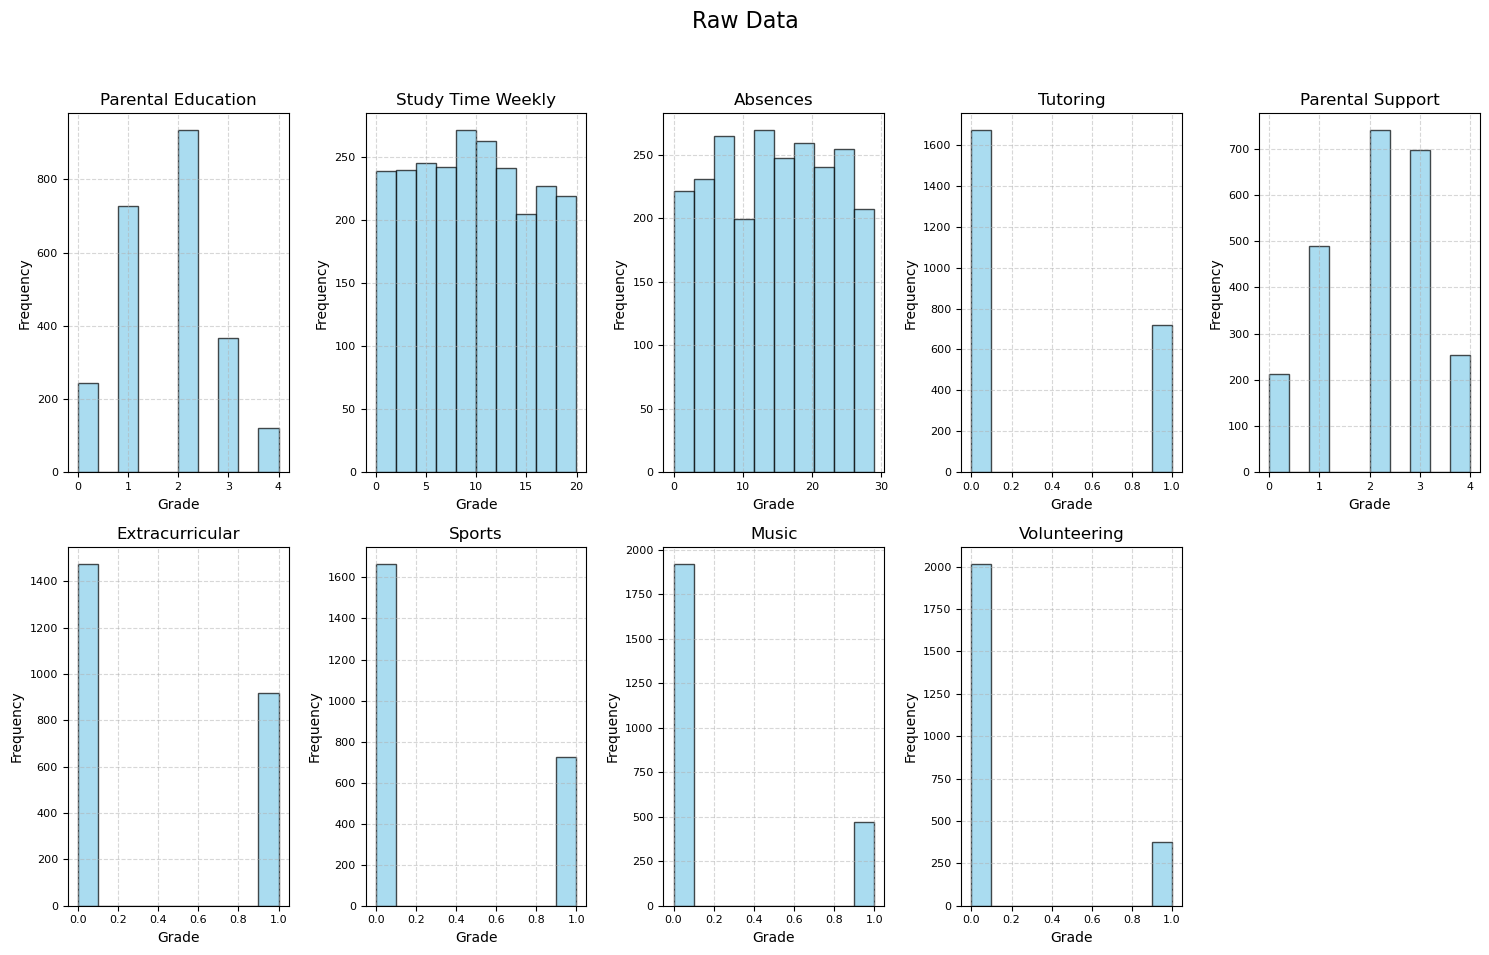

In [10]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2 = np.array(df['StudyTimeWeekly'])
y3 = np.array(df['Absences'])
y4 = np.array(df['Tutoring'])
y5= np.array(df['ParentalSupport'])
y6 = np.array(df['Extracurricular'])
y7 = np.array(df['Sports'])
y8 = np.array(df['Music'])
y9 = np.array(df['Volunteering'])

y = {'Parental Education' : y1, 'Study Time Weekly' : y2, 'Absences' : y3, 'Tutoring' : y4,'Parental Support' : y5, 'Extracurricular' : y6, 'Sports' : y7, 'Music' : y8, 'Volunteering': y9}

Plot_Histograms(x,y, title = 'Raw Data')

This data analysis shows us that extracurricular and tutoring can be dropped with the skew data. Maybe after sorting the data we can re-attempt them but as of now we drop them. Study time and absence needs further inspection, but they do not have any relationship with the grade directly.

DATA=2


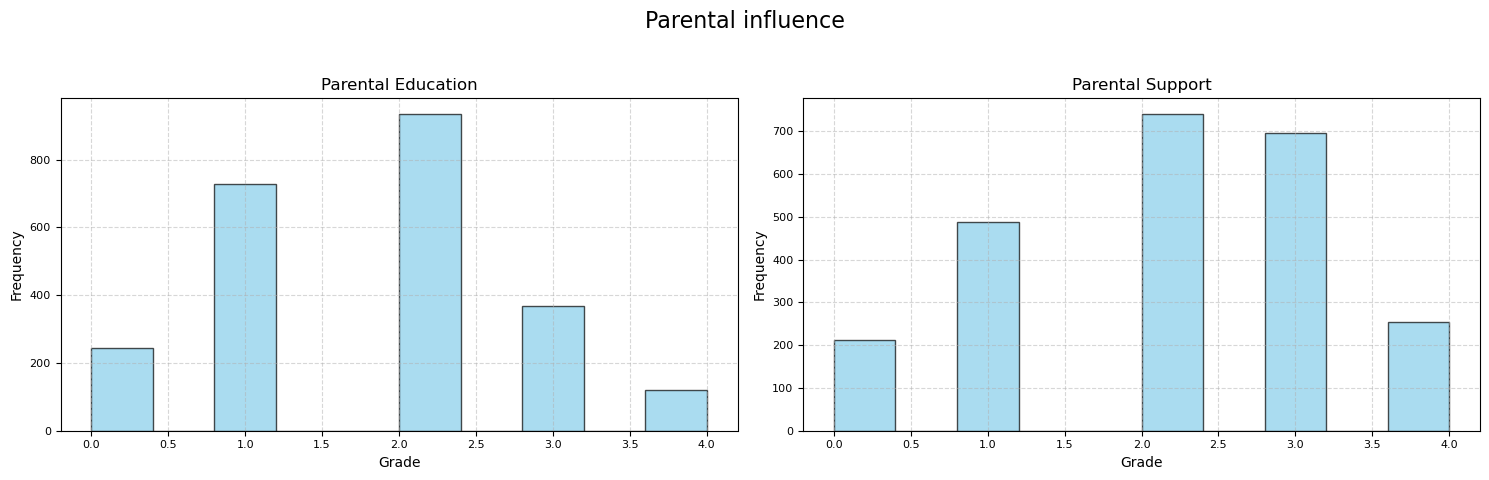

In [11]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2= np.array(df['ParentalSupport'])

y = {'Parental Education' : y1, 'Parental Support' : y2}

Plot_Histograms(x,y, title = 'Parental influence')

We can see signs that parental education has a positive trend for students up to C but the students that are B and up are adapted enough to school to not need parental education.

Same with the parental support but it also includes B students.

Thus, contacting parents regarding their influence we can identify early who might need extra help.

# Feature Engineering 

In [14]:
# Binary encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#  hot encode multi=class categorical features 
df = pd.get_dummies(df, columns=['Ethnicity', 'ParentalEducation'], drop_first=True)

In [15]:
# total extracurricular involvement
df['Total_Activities'] = df[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)

In [16]:
# high engagement flag
df['High_Engagement'] = (df['Total_Activities'] >= 2).astype(int)

In [17]:
#academic support composiste 
df['AcademicSupportScore'] = df['Tutoring'] + df['ParentalSupport']

# Evaluation Metrics

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.32      0.48        22
         1.0       0.76      0.90      0.82        49
         2.0       0.89      0.86      0.87        85
         3.0       0.88      0.91      0.89        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.90      0.79      0.81       479
weighted avg       0.91      0.91      0.90       479



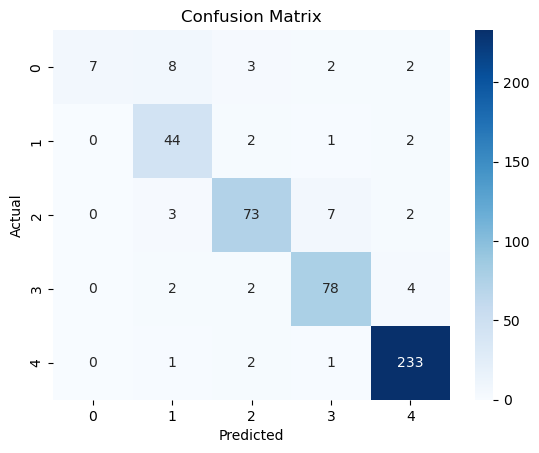

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df.drop(['GradeClass', 'Grade'], axis=1)  
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()